In [1]:
!pip install shapely

In [2]:
from shapely import wkt
from shapely.validation import explain_validity
import json

In [3]:
file_path = "sample_data/Problem 2 - streets_xgen.wkt"

In [4]:
with open(file_path, "r") as file:
    wkt_lines = file.readlines()

print(f"Total geometries loaded: {len(wkt_lines)}")

Total geometries loaded: 77


In [5]:
error_report = []

for idx, line in enumerate(wkt_lines):
    line = line.strip()

    try:
        geometry = wkt.loads(line)

        # Rule-based checks
        if geometry.is_empty:
            error_report.append({
                "street_id": idx,
                "error_type": "Invalid Line Geometry",
                "reason": "Empty geometry"
            })

        elif not geometry.is_valid:
            error_report.append({
                "street_id": idx,
                "error_type": "Invalid Line Geometry",
                "reason": explain_validity(geometry)
            })

        elif geometry.length == 0:
            error_report.append({
                "street_id": idx,
                "error_type": "Invalid Line Geometry",
                "reason": "Zero-length line"
            })

    except Exception as e:
        error_report.append({
            "street_id": idx,
            "error_type": "Parsing Error",
            "reason": str(e)
        })

In [6]:
print(f"❌ Total errors detected: {len(error_report)}")

❌ Total errors detected: 36


In [7]:
for error in error_report[:5]:
    print(error)

{'street_id': 0, 'error_type': 'Parsing Error', 'reason': 'ParseException: Expected number but encountered end of stream'}
{'street_id': 1, 'error_type': 'Parsing Error', 'reason': "ParseException: Expected word but encountered number: '7081.75'"}
{'street_id': 2, 'error_type': 'Parsing Error', 'reason': "ParseException: Expected word but encountered number: '7105.3'"}
{'street_id': 3, 'error_type': 'Parsing Error', 'reason': "ParseException: Expected word but encountered number: '7154.42'"}
{'street_id': 4, 'error_type': 'Parsing Error', 'reason': "ParseException: Expected word but encountered number: '7225.94'"}


In [8]:
output_file = "street_geometry_error_report.json"

with open(output_file, "w") as f:
    json.dump(error_report, f, indent=4)

print(f"✅ Error report saved as {output_file}")

✅ Error report saved as street_geometry_error_report.json


In [9]:
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

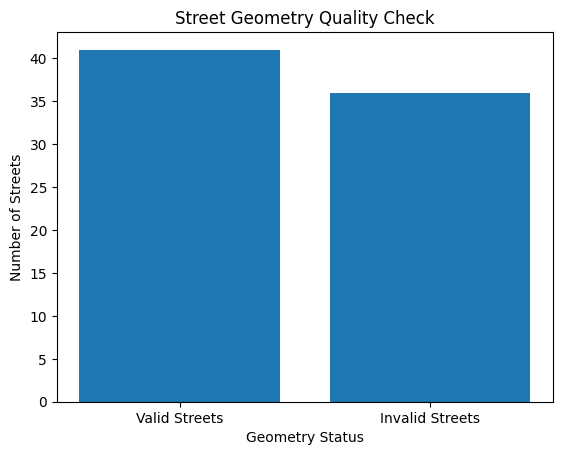

In [10]:
import matplotlib.pyplot as plt

# Count valid vs invalid
total_streets = len(wkt_lines)
invalid_streets = len(error_report)
valid_streets = total_streets - invalid_streets

# Plot
labels = ['Valid Streets', 'Invalid Streets']
values = [valid_streets, invalid_streets]

plt.figure()
plt.bar(labels, values)
plt.title('Street Geometry Quality Check')
plt.ylabel('Number of Streets')
plt.xlabel('Geometry Status')
plt.show()

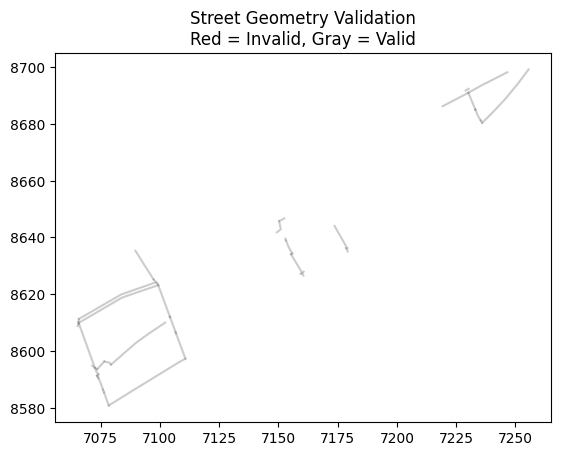

In [11]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt

plt.figure()

for idx, line in enumerate(wkt_lines):
    try:
        geom = wkt.loads(line.strip())
        x, y = geom.xy

        if any(err['street_id'] == idx for err in error_report):
            plt.plot(x, y, color='red', linewidth=2)
        else:
            plt.plot(x, y, color='gray', alpha=0.4)
    except:
        pass

plt.title("Street Geometry Validation\nRed = Invalid, Gray = Valid")
plt.show()